In [1]:
from Bio import SeqIO
from Bio import AlignIO

In [2]:
id = []
sequence = []
with open("HIV_env_pep.aln") as handle:
    for seq in SeqIO.parse(handle, "fasta"):
        id.append(seq.id)
        sequence.append(str(seq.seq))

In [3]:
import pandas as pd
df = pd.DataFrame(list(zip(id,sequence)), columns = ["ID", "sequence"])
df["sequence"] = df["sequence"].str.strip()
df["sequence"] = df["sequence"].str.replace('-','')

In [4]:
df.head()

,ID,sequence
0,EU308561.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWR...
1,EU308562.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWR...
2,EU308541.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...
3,EU308543.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...
4,EU308555.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...


In [5]:
xlsx_labels = pd.read_excel("/Users/waynelam/Desktop/WayneLab/HIVClassifier/CellularTropismProject_Master.xlsx", sheet_name=1)
xlsx_labels.drop(["M_tropism_level","Lily_notes"],axis=1,inplace=True)
xlsx_labels["seq"] = xlsx_labels["seq"].str.replace(' ','')
xlsx_labels

,seq,Wayne_rank
0,JN002049.1,Non
1,JN002030.1,Non
2,JN002033.1,Non
3,JN002040.1,Non
4,JN002043.1,Non
...,...,...
82,DQ976419.1,Non
83,DQ976420.1,Non
84,DQ976426.1,M-tropic
85,DQ976428.1,M-tropic


In [6]:
df_merged = df.merge(xlsx_labels, how="right", left_on="ID", right_on="seq")

In [7]:
df_merged

,ID,sequence,seq,Wayne_rank
0,JN002049.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,JN002049.1,Non
1,JN002030.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,JN002030.1,Non
2,JN002033.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,JN002033.1,Non
3,JN002040.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,JN002040.1,Non
4,JN002043.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,JN002043.1,Non
...,...,...,...,...
82,DQ976419.1,MRVTGIMRSYQNLWIWGTMMLLGIFMICNANLWVTVYYGVPVWKEA...,DQ976419.1,Non
83,DQ976420.1,MRVTGIMRSYQNLWIWSTMMLLGIFMICNANLWVTVYYGVPVWKEA...,DQ976420.1,Non
84,DQ976426.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKE...,DQ976426.1,M-tropic
85,DQ976428.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWATVYYGVPVWKE...,DQ976428.1,M-tropic


In [8]:
df_merged.describe()

,ID,sequence,seq,Wayne_rank
count,87,87,87,87
unique,87,83,87,2
top,JN002049.1,MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKE...,JN002049.1,M-tropic
freq,1,5,1,60


In [9]:
duplicates = df_merged["sequence"].duplicated(keep=False)
for i in range(len(duplicates)):
    if(duplicates[i]):
        print(df_merged["ID"][i], df_merged["sequence"][i])

DQ976381.1 MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVELENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVRLTPLCVILNCTDLKNDTTTTSGGGGIMMEKGEIKNCSFSINTRGRNKEQKDYAFFYKLDVVPINNNNSYRLISCNTSVITQACPKVSFEPIPIHYCAPAGFAILKCKDKKFNGTGPCKNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSANFSDNTKTIMVQLKEAVEINCTRPNNNTRKSIPMGPGKAFYTTGEIIGDIRQAHCNLSITKWNNTLKQIVEKLREQFENKTIIFNQSAGGDPEIVMHSFNCGGEFFYCNSTQLFNSTWSSNSTWNDTQGSNNPEGNDTITLTCRIKQFINMWQEVGKAMYAPPISGQIRCSSNITGLLLTRDGGTNEISNQTEIFRPGGGDMRDNWRSELYKYKVVKIEPLGVAPTKAKRRVVQREKRAAVGLGAVFLGFLGAAGSTMGAASITLTAQARQLLSGIVQQQNNLLRAIEAQQHLLQLTVWGIKQLQARVLAVERYLKDQQLLGIWGCSGKLICTTTVPWNASWSNKSLDKIWNNMTWMEWEREINNYTSLIYNLIEESQNQQEKNEQELLELDKWASLWNWFDITQWLWYIRIFIMIVGGLIGLRIVFAVLSIVNRVRQGYSPLSFQTRFPAPRGPDRPGGTEEEGGERDRDRSGRLVNGFLALIWDDLRSLCLFSYHRLRDLLLIVTRIVELLGRRGWEALKYWGNLLQYWSQELKNSAVSLLNVTAIAVAEGTDRVIEVLQRAFRAILHIPRRIRQGLERALL
DQ976385.1 MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVELENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVR

In [10]:
df_merged.drop('seq', axis=1, inplace=True)
df_merged.rename(columns={"Wayne_rank":"tropism"}, inplace=True)

In [11]:
df_merged

,ID,sequence,tropism
0,JN002049.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,Non
1,JN002030.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,Non
2,JN002033.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,Non
3,JN002040.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,Non
4,JN002043.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,Non
...,...,...,...
82,DQ976419.1,MRVTGIMRSYQNLWIWGTMMLLGIFMICNANLWVTVYYGVPVWKEA...,Non
83,DQ976420.1,MRVTGIMRSYQNLWIWSTMMLLGIFMICNANLWVTVYYGVPVWKEA...,Non
84,DQ976426.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKE...,M-tropic
85,DQ976428.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWATVYYGVPVWKE...,M-tropic


train test split

In [12]:
from sklearn.model_selection import train_test_split
tropic_column = df_merged["tropism"]
train_df, test_df = train_test_split(df_merged, test_size=0.2, random_state=42, stratify = tropic_column)

In [13]:
train_df.describe()

,ID,sequence,tropism
count,69,69,69
unique,69,65,2
top,EU308547.1,MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKE...,M-tropic
freq,1,5,48


In [14]:
test_df.describe()

,ID,sequence,tropism
count,18,18,18
unique,18,18,2
top,DQ976430.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKE...,M-tropic
freq,1,1,12


In [15]:
import torch
import esm

# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()

ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0-32): 33 x TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
  )
  (contact_head): ContactPredictionHead(
    (regression): Linear(in_features=660, out_features=1, bias=True)
    (activation): Sigmoid()
  )
  (emb_layer_norm_after): LayerNorm((1280,), eps=1

In [16]:
train_data = [(tuple(list(x))[0], tuple(list(x))[1])  for x in list(train_df[['ID','sequence']].values)]
print(train_data)

[('EU308547.1', 'MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWKEATTTLFCASDAKAYDPEVHNVWATHACVPTDPNPQEVVLGNVTEDFNMWKNKMVEQMHEDIISLWDQSLKPCVKLTPLCVTLNCTDKWGNTTNTNNANTNSTSWREEMKNCSFNVTTSIRDRVKGYALFYKLDVVQINNDNTTYRLINCNTSVITQACPKVSFEPIPIHYCAPAGFAILKCNDKKFKGKGPCRNVSTVQCTHGIRPVVSSQLLLNGSLAEEEVVIRSENFTNNAKTIIVQLNEPVEINCTRPGNNTRKSIPLGPGKAFYATGDIIGDIRQAHCNISQAKWNKTLNQIVIKLREQFNKTIIFNQSSGGDPEIVMHSFNCGGEFFYCDSTELFNSTWTLNDTRQINNTDRNITLPCRIKQIINLWQQVGKAMYAPPIRGQIRCSSNITGLLLTRDGGHNTTKNMTETFRPGGGDMRDNWRSELYKYKVVQIEPLGVAPTKAKRRVVQREK'), ('DQ976425.1', 'MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVLLENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVKLTPLCVTLNCTDLRNTTNATSSSGGTMGGGEMKNCSFNITTSIRDKMQKEYALFYKLDIIPIANDNTSYRLINCNTSVITQACPKVTFEPIPIHYCAPAGFAILKCNNKRFNGTGPCTNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSANFSDNAKNIIVQLNETVEINCTRPNNNTRKSIPIGPGRAIYTTGQIIGDIRQAHCNLSRAKWNETLKQIVTKLREQFGNKTIVFNQSSGGDPEIVTHSFNCGGEFFYCNSTQLFNSTWNITEESNSIEGNDTITLPCRIKQIVNMWQEVGKAMYAPPIRGQIRCSSNITGLILTRDGGNENENET

In [17]:
dummy_train = train_data

In [18]:
tr_batch_labels, tr_batch_strs, tr_batch_tokens = batch_converter(dummy_train)
tr_batch_lens = (tr_batch_tokens != alphabet.padding_idx).sum(1)

In [19]:
import numpy as np

In [20]:
# Extract per-residue representations (on CPU)
#with torch.no_grad():
    #tr_results = model(tr_batch_tokens, repr_layers=[33], return_contacts=False)

run overnight on laptop

In [21]:
#tr_token_representations = tr_results["representations"][33]

In [22]:
#np.save('esm_features_train.npy', tr_token_representations)

In [23]:
tr_token_representations = np.load('esm_features_train.npy')

In [24]:
train_data

[('EU308547.1',
  'MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWKEATTTLFCASDAKAYDPEVHNVWATHACVPTDPNPQEVVLGNVTEDFNMWKNKMVEQMHEDIISLWDQSLKPCVKLTPLCVTLNCTDKWGNTTNTNNANTNSTSWREEMKNCSFNVTTSIRDRVKGYALFYKLDVVQINNDNTTYRLINCNTSVITQACPKVSFEPIPIHYCAPAGFAILKCNDKKFKGKGPCRNVSTVQCTHGIRPVVSSQLLLNGSLAEEEVVIRSENFTNNAKTIIVQLNEPVEINCTRPGNNTRKSIPLGPGKAFYATGDIIGDIRQAHCNISQAKWNKTLNQIVIKLREQFNKTIIFNQSSGGDPEIVMHSFNCGGEFFYCDSTELFNSTWTLNDTRQINNTDRNITLPCRIKQIINLWQQVGKAMYAPPIRGQIRCSSNITGLLLTRDGGHNTTKNMTETFRPGGGDMRDNWRSELYKYKVVQIEPLGVAPTKAKRRVVQREK'),
 ('DQ976425.1',
  'MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVLLENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVKLTPLCVTLNCTDLRNTTNATSSSGGTMGGGEMKNCSFNITTSIRDKMQKEYALFYKLDIIPIANDNTSYRLINCNTSVITQACPKVTFEPIPIHYCAPAGFAILKCNNKRFNGTGPCTNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSANFSDNAKNIIVQLNETVEINCTRPNNNTRKSIPIGPGRAIYTTGQIIGDIRQAHCNLSRAKWNETLKQIVTKLREQFGNKTIVFNQSSGGDPEIVTHSFNCGGEFFYCNSTQLFNSTWNITEESNSIEGNDTITLPCRIKQIVNMWQEVGKAMYAPPIRGQIRCSSNITGLILTRDGGNE

In [25]:
# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
tr_sequence_representations = []
for i, tokens_len in enumerate(tr_batch_lens):
    tr_sequence_representations.append(tr_token_representations[i, 1 : tokens_len - 1].mean(0))


In [26]:
len(tr_sequence_representations)

69

In [27]:
tr_sequence_representations

[array([ 0.08490711, -0.07496126, -0.07719713, ..., -0.0226382 ,
         0.00400131, -0.03230825], dtype=float32),
 array([ 0.11518726, -0.09125288, -0.06100389, ...,  0.0015425 ,
         0.02060808,  0.03088068], dtype=float32),
 array([ 0.11272071, -0.07385441, -0.06029629, ...,  0.00668852,
         0.02963536,  0.0279387 ], dtype=float32),
 array([ 0.11749897, -0.08280743, -0.06183972, ...,  0.006782  ,
         0.01618916,  0.02772038], dtype=float32),
 array([ 0.12083178, -0.09043114, -0.06316222, ...,  0.01075422,
         0.023979  ,  0.01127691], dtype=float32),
 array([ 0.06380342, -0.08232762, -0.0830778 , ..., -0.02024761,
        -0.00299281, -0.03924829], dtype=float32),
 array([ 0.12354471, -0.09449242, -0.0709796 , ...,  0.00449767,
         0.0174195 ,  0.02368402], dtype=float32),
 array([ 0.12118679, -0.08698714, -0.07166592, ...,  0.00112348,
         0.0192371 ,  0.01015724], dtype=float32),
 array([ 0.12235231, -0.08623407, -0.06475428, ...,  0.00158986,
       

In [28]:
train_labels = train_df["tropism"]

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
label_encoder = OneHotEncoder(handle_unknown='ignore')


In [30]:
train_labels = train_labels

In [31]:
np.shape(train_labels.values.reshape(-1,1))

(69, 1)

In [33]:
tr_encoded_data = label_encoder.fit_transform(train_labels.values.reshape(-1,1))

In [34]:
tr_encoded_data

<69x2 sparse matrix of type '<class 'numpy.float64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15, random_state=42)

In [36]:
x = tr_sequence_representations

SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

sm_1 = SMOTE(random_state=42)
X_res, y_res = sm_1.fit_resample(x,  tr_encoded_data.toarray())

In [38]:
y_res

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [37]:
np.shape(y_res)


(96, 1)

In [38]:
np.shape(X_res)

(96, 1280)

In [39]:
class_counts = tr_encoded_data.toarray().sum(axis=0)
print(class_counts)

[48. 21.]


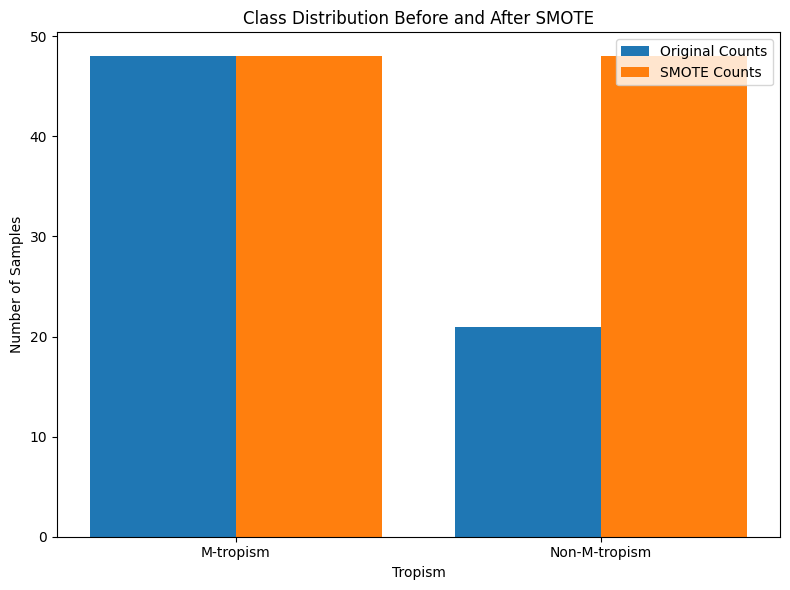

In [61]:
import matplotlib.pyplot as plt

# Given data
tropism = ['M-tropism', 'Non-M-tropism']
original_counts = tr_encoded_data.toarray().sum(axis=0)
smote_counts =y_res.sum(axis=0) # Updated counts after applying SMOTE

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the original and SMOTE counts as two separate bars
width = 0.4
x = range(len(tropism))

ax.bar(x, original_counts, width=width, label='Original Counts')
ax.bar([i + width for i in x], smote_counts, width=width, label='SMOTE Counts')

# Adding labels and title
ax.set_xlabel('Tropism')
ax.set_ylabel('Number of Samples')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(tropism)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
rfc.fit(X_res, y_res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=15, random_state=42)

In [42]:
y_pred = rfc.predict(X_res)

In [43]:
np.shape(y_pred)

(96,)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
accuracy = accuracy_score(y_res, y_pred)
precision = precision_score(y_res, y_pred, average='macro')
recall = recall_score(y_res, y_pred, average='macro')
f1 = f1_score(y_res, y_pred, average='macro')

In [45]:
test_data = [(tuple(list(x))[1], tuple(list(x))[0])  for x in list(test_df[['sequence','ID']].values)]
test_batch_labels, test_batch_strs, test_batch_tokens = batch_converter(test_data)
test_batch_lens = (test_batch_tokens != alphabet.padding_idx).sum(1)


In [46]:
# Extract per-residue representations (on CPU)
#with torch.no_grad():
    #test_results = model(test_batch_tokens, repr_layers=[33], return_contacts=False)


In [47]:
#test_token_representations = test_results["representations"][33]

In [48]:
#np.save('esm_features_test.npy', test_token_representations)

In [49]:
test_token_representations = np.load('esm_features_test.npy')

In [50]:
# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
test_sequence_representations = []
for i, tokens_len in enumerate(test_batch_lens):
    test_sequence_representations.append(test_token_representations[i, 1 : tokens_len - 1].mean(0))
test_labels = test_df['tropism']

In [51]:
transformed_labels = label_encoder.transform(test_labels.values.reshape(-1,1))

In [52]:
x_test = test_sequence_representations

In [53]:
y_pred_test = rfc.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [59]:
y_pred_test_encoded = label_encoder.fit_transform(y_pred_test.reshape(-1,1))

<18x2 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [60]:
test_original = label_encoder.inverse_transform(y_pred_test_encoded.toarray())
test_original

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
def func_to_check(max_dep, n_estimators):
  rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_depth=max_dep)
  x = tr_sequence_representations
  rfc.fit(X_res, y_res)
  y_pred = rfc.predict(x)
  y_pred_encoded = label_encoder.fit_transform(y_pred.reshape(-1,1))
  accuracy = accuracy_score(tr_encoded_data.toarray(), y_pred_encoded.toarray())
  precision = precision_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
  recall = recall_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
  f1 = f1_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
  y_pred_test = rfc.predict(x_test)
  y_pred_test_encoded = label_encoder.fit_transform(y_pred_test.reshape(-1,1))
  test_accuracy = accuracy_score(transformed_labels.toarray(), y_pred_test_encoded.toarray())
  test_precision = precision_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')
  test_recall = recall_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')
  test_f1 = f1_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')
  return accuracy, precision, recall, f1 , test_accuracy, test_precision, test_recall, test_f1

In [ ]:
import numpy as np
n_estimators_range = np.linspace(10, 200, 10).astype(int)

In [ ]:
for n_estimators in n_estimators_range:
  for max_dep in [5, 7, 8, 10, 15, 20, 25, 30, 40]:

    print("max depth: ", max_dep, "n_ estimators:", n_estimators, "metrics:", func_to_check(max_dep, n_estimators))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  5 n_ estimators: 10 metrics: (0.9855072463768116, 0.9772727272727273, 0.9895833333333333, 0.9831089351285189, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  7 n_ estimators: 10 metrics: (0.9855072463768116, 0.9772727272727273, 0.9895833333333333, 0.9831089351285189, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  8 n_ estimators: 10 metrics: (0.9855072463768116, 0.9772727272727273, 0.9895833333333333, 0.9831089351285189, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  10 n_ estimators: 10 metrics: (0.9855072463768116, 0.9772727272727273, 0.9895833333333333, 0.9831089351285189, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  15 n_ estimators: 10 metrics: (0.9855072463768116, 0.9772727272727273, 0.9895833333333333, 0.9831089351285189, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.888888

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  10 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  15 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  20 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  25 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  30 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  40 n_ estimators: 31 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  5 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  7 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  8 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  10 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  15 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  20 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  25 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  30 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  40 n_ estimators: 52 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  5 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  7 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  8 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  10 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  15 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  20 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  25 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  30 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

max depth:  40 n_ estimators: 73 metrics: (1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8441558441558441, 0.8333333333333334, 0.8361204013377928)
max depth:  5 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  7 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  8 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  10 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  15 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  20 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  25 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  30 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  40 n_ estimators: 94 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  5 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  7 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  8 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  10 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  15 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  20 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  25 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  30 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  40 n_ estimators: 115 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  5 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  7 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  8 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  10 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  15 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  20 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  25 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  30 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  40 n_ estimators: 136 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  5 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  7 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  8 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  10 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  15 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  20 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  25 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  30 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  40 n_ estimators: 157 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  5 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  7 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  8 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  10 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  15 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  20 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  25 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  30 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  40 n_ estimators: 178 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  5 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888)
max depth:  7 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  8 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  10 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  15 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  20 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  25 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)
max depth:  30 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


max depth:  40 n_ estimators: 200 metrics: (1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9487179487179487, 0.9444444444444444, 0.9430303030303029)


In [ ]:
max_dep = 5
n_estimators = 94

In [ ]:
rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_depth=max_dep)
#x = [tensor.numpy() for tensor in tr_sequence_representations]
x = tr_sequence_representations
rfc.fit(X_res,y_res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=94, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_depth=max_dep)
#x = [tensor.numpy() for tensor in tr_sequence_representations]
x = tr_sequence_representations
rfc.fit(X_res, y_res)
y_pred = rfc.predict(x)
y_pred_encoded = label_encoder.fit_transform(y_pred.reshape(-1,1))
accuracy = accuracy_score(tr_encoded_data.toarray(), y_pred_encoded.toarray())
precision = precision_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
recall = recall_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
f1 = f1_score(tr_encoded_data.toarray(), y_pred_encoded.toarray(), average='macro')
y_pred_test = rfc.predict(x_test)
y_pred_test_encoded = label_encoder.fit_transform(y_pred_test.reshape(-1,1))
test_accuracy = accuracy_score(transformed_labels.toarray(), y_pred_test_encoded.toarray())
test_precision = precision_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')
test_recall = recall_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')
test_f1 = f1_score(transformed_labels.toarray(), y_pred_test_encoded.toarray(), average='weighted')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [59]:
from tabulate import tabulate

results = [
    ["Metric", "Train", "Test"],
    ["Accuracy", accuracy, test_accuracy],
    ["Precision", precision, test_precision],
    ["Recall", recall, test_recall],
    ["F1 Score", f1, test_f1]
]

table = tabulate(results, headers="firstrow", tablefmt="fancy_grid")
print(table)


╒═══════════╤═════════╤══════════╕
│ Metric    │   Train │     Test │
╞═══════════╪═════════╪══════════╡
│ Accuracy  │       1 │ 0.944444 │
├───────────┼─────────┼──────────┤
│ Precision │       1 │ 0.948718 │
├───────────┼─────────┼──────────┤
│ Recall    │       1 │ 0.944444 │
├───────────┼─────────┼──────────┤
│ F1 Score  │       1 │ 0.94303  │
╘═══════════╧═════════╧══════════╛
